# Auto encoders 

Author: Gabriel Rodrigues Palma

additional source: DataCamp and MIT introduction to Deep Learning

## Loading the packages

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from keract import get_activations, display_activations

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

## Loading the data and visualizing it

In [4]:
data = pd.read_csv('../Data/5G-production-dataset/Download/Static/B_2019.12.16_13.40.04.csv')

In [7]:
data.describe()

,Longitude,Latitude,Speed,CellID,RSRP,RSRQ,SNR,CQI,DL_bitrate,UL_bitrate,RAWCELLID
count,2.143000e+03,2.143000e+03,2143.0,2143.0,2143.000000,2143.000000,2143.000000,2143.00000,2143.000000,2143.000000,2143.0
mean,-8.394628e+00,5.188614e+01,0.0,11.0,-95.999067,-13.856276,3.717219,10.65329,50382.109193,141.879608,10805003.0
std,1.221694e-07,9.162706e-08,0.0,0.0,1.274617,2.239170,3.260739,1.91965,65620.519457,122.211380,0.0
min,-8.394628e+00,5.188614e+01,0.0,11.0,-104.000000,-19.000000,-7.000000,6.00000,0.000000,0.000000,10805003.0
25%,-8.394628e+00,5.188614e+01,0.0,11.0,-96.000000,-16.000000,2.000000,10.00000,3229.500000,44.000000,10805003.0
50%,-8.394628e+00,5.188614e+01,0.0,11.0,-96.000000,-14.000000,4.000000,11.00000,23853.000000,128.000000,10805003.0
75%,-8.394628e+00,5.188614e+01,0.0,11.0,-95.000000,-12.000000,6.000000,11.00000,61175.000000,215.000000,10805003.0
max,-8.394624e+00,5.188614e+01,0.0,11.0,-93.000000,-9.000000,15.000000,15.00000,302694.000000,1215.000000,10805003.0


In [8]:
data.drop('Speed', inplace=True, axis=1)

In [9]:
data.describe()

,Longitude,Latitude,CellID,RSRP,RSRQ,SNR,CQI,DL_bitrate,UL_bitrate,RAWCELLID
count,2.143000e+03,2.143000e+03,2143.0,2143.000000,2143.000000,2143.000000,2143.00000,2143.000000,2143.000000,2143.0
mean,-8.394628e+00,5.188614e+01,11.0,-95.999067,-13.856276,3.717219,10.65329,50382.109193,141.879608,10805003.0
std,1.221694e-07,9.162706e-08,0.0,1.274617,2.239170,3.260739,1.91965,65620.519457,122.211380,0.0
min,-8.394628e+00,5.188614e+01,11.0,-104.000000,-19.000000,-7.000000,6.00000,0.000000,0.000000,10805003.0
25%,-8.394628e+00,5.188614e+01,11.0,-96.000000,-16.000000,2.000000,10.00000,3229.500000,44.000000,10805003.0
50%,-8.394628e+00,5.188614e+01,11.0,-96.000000,-14.000000,4.000000,11.00000,23853.000000,128.000000,10805003.0
75%,-8.394628e+00,5.188614e+01,11.0,-95.000000,-12.000000,6.000000,11.00000,61175.000000,215.000000,10805003.0
max,-8.394624e+00,5.188614e+01,11.0,-93.000000,-9.000000,15.000000,15.00000,302694.000000,1215.000000,10805003.0


In [10]:
data.shape

(2143, 25)

In [11]:
data = data[['Longitude', 'Latitude','CellID','RSRP','RSRQ','SNR','CQI','DL_bitrate','UL_bitrate','RAWCELLID']]

In [12]:
data = minmax_scale(data)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.3, random_state=42)

## Creating important fnuctions

In [14]:
def show_encodings(encoded_imgs,number=1):
    n = 5  # how many digits we will display
    original = X_test
    original = original[np.where(y_test == number)]
    encoded_imgs = encoded_imgs[np.where(y_test==number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(2, 5))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(2, 5))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(2, 5))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Real vs Decoded images')
    plt.show()

In [15]:
def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 5
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()

In [16]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

## Implementing auto encoders with MNIST data

In [18]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(Dense(4, input_shape=(10, ), activation="relu"))

# Add an output layer with as many neurons as the orginal image pixels
autoencoder.add(Dense(10, activation = "sigmoid"))

# Compile your model with adadelta
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = 'accuracy')

# Summarize your model structure
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
 dense_3 (Dense)             (None, 10)                50        
                                                                 
Total params: 94
Trainable params: 94
Non-trainable params: 0
_________________________________________________________________


In [19]:
X_train

array([[0.        , 1.        , 0.        , ..., 0.20402122, 0.21069959,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.08267425, 0.11934156,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02185375, 0.02304527,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.10314707, 0.11358025,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.03363132, 0.10288066,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
# training the model
autoencoder.fit(X_train, X_train, epochs=4000)

Epoch 1/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.9987
Epoch 2/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.9987
Epoch 3/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3768 - accuracy: 0.9987
Epoch 4/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3768 - accuracy: 0.9987
Epoch 5/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3768 - accuracy: 0.9987
Epoch 6/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3767 - accuracy: 0.9987
Epoch 7/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3767 - accuracy: 0.9987
Epoch 8/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.9987
Epoch 9/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.9987
Epoch 10/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.9987

47/47 [==============================] - 0s 4ms/step - loss: 0.3740 - accuracy: 0.9987
Epoch 83/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3740 - accuracy: 0.9987
Epoch 84/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.9987
Epoch 85/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.9987
Epoch 86/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.9987
Epoch 87/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3738 - accuracy: 0.9987
Epoch 88/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3738 - accuracy: 0.9987
Epoch 89/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3738 - accuracy: 0.9987
Epoch 90/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3737 - accuracy: 0.9987
Epoch 91/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3737 - accuracy: 0.9987
Epoc

47/47 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.9987
Epoch 163/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.9987
Epoch 164/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.9987
Epoch 165/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3714 - accuracy: 0.9987
Epoch 166/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3714 - accuracy: 0.9987
Epoch 167/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3714 - accuracy: 0.9987
Epoch 168/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.9987
Epoch 169/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.9987
Epoch 170/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.9987
Epoch 171/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3712 - accuracy: 0.

47/47 [==============================] - 0s 5ms/step - loss: 0.3693 - accuracy: 0.9987
Epoch 243/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3693 - accuracy: 0.9987
Epoch 244/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.9987
Epoch 245/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.9987
Epoch 246/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.9987
Epoch 247/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3692 - accuracy: 0.9987
Epoch 248/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3691 - accuracy: 0.9987
Epoch 249/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3691 - accuracy: 0.9987
Epoch 250/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3691 - accuracy: 0.9987
Epoch 251/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3691 - accuracy: 0.

47/47 [==============================] - 0s 4ms/step - loss: 0.3674 - accuracy: 0.9987
Epoch 323/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.9987
Epoch 324/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.9987
Epoch 325/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.9987
Epoch 326/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.9987
Epoch 327/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3672 - accuracy: 0.9987
Epoch 328/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3672 - accuracy: 0.9987
Epoch 329/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3672 - accuracy: 0.9987
Epoch 330/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3672 - accuracy: 0.9987
Epoch 331/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.

47/47 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.9987
Epoch 403/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.9987
Epoch 404/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.9987
Epoch 405/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.9987
Epoch 406/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.9987
Epoch 407/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3655 - accuracy: 0.9987
Epoch 408/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3655 - accuracy: 0.9987
Epoch 409/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3655 - accuracy: 0.9987
Epoch 410/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3655 - accuracy: 0.9987
Epoch 411/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3655 - accuracy: 0.

47/47 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.9987
Epoch 483/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.9987
Epoch 484/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.9987
Epoch 485/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.9987
Epoch 486/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3640 - accuracy: 0.9987
Epoch 487/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3640 - accuracy: 0.9987
Epoch 488/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3640 - accuracy: 0.9987
Epoch 489/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3640 - accuracy: 0.9987
Epoch 490/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3640 - accuracy: 0.9987
Epoch 491/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3640 - accuracy: 0.

47/47 [==============================] - 0s 4ms/step - loss: 0.3628 - accuracy: 0.9987
Epoch 563/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3628 - accuracy: 0.9987
Epoch 564/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.9987
Epoch 565/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.9987
Epoch 566/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.9987
Epoch 567/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.9987
Epoch 568/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.9987
Epoch 569/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.9987
Epoch 570/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.9987
Epoch 571/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3626 - accuracy: 0.

47/47 [==============================] - 0s 4ms/step - loss: 0.3616 - accuracy: 0.9987
Epoch 643/4000
47/47 [==============================] - 0s 6ms/step - loss: 0.3616 - accuracy: 0.9987
Epoch 644/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3616 - accuracy: 0.9987
Epoch 645/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.9987
Epoch 646/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.9987
Epoch 647/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.9987
Epoch 648/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.9987
Epoch 649/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.9987
Epoch 650/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.9987
Epoch 651/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.

47/47 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.9987
Epoch 723/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.9987
Epoch 724/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.9987
Epoch 725/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.9987
Epoch 726/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.9987
Epoch 727/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.9987
Epoch 728/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.9987
Epoch 729/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.9987
Epoch 730/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3604 - accuracy: 0.9987
Epoch 731/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3604 - accuracy: 0.

47/47 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.9987
Epoch 803/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.9987
Epoch 804/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.9987
Epoch 805/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.9987
Epoch 806/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.9987
Epoch 807/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.9987
Epoch 808/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.9987
Epoch 809/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.9987
Epoch 810/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.9987
Epoch 811/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.

47/47 [==============================] - 0s 4ms/step - loss: 0.3588 - accuracy: 0.9987
Epoch 883/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3588 - accuracy: 0.9987
Epoch 884/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.9987
Epoch 885/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.9987
Epoch 886/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.9987
Epoch 887/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3587 - accuracy: 0.9987
Epoch 888/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.9987
Epoch 889/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.9987
Epoch 890/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.9987
Epoch 891/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.

47/47 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy: 0.9987
Epoch 963/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy: 0.9987
Epoch 964/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy: 0.9987
Epoch 965/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy: 0.9987
Epoch 966/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy: 0.9987
Epoch 967/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy: 0.9987
Epoch 968/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy: 0.9987
Epoch 969/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3579 - accuracy: 0.9987
Epoch 970/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3579 - accuracy: 0.9987
Epoch 971/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3579 - accuracy: 0.

47/47 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9987
Epoch 1043/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9987
Epoch 1044/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9987
Epoch 1045/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9987
Epoch 1046/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9987
Epoch 1047/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9987
Epoch 1048/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9987
Epoch 1049/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9987
Epoch 1050/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9987
Epoch 1051/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3573 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.9987
Epoch 1122/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.9987
Epoch 1123/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.9987
Epoch 1124/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.9987
Epoch 1125/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.9987
Epoch 1126/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.9987
Epoch 1127/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.9987
Epoch 1128/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.9987
Epoch 1129/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.9987
Epoch 1130/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3567 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3562 - accuracy: 0.9987
Epoch 1201/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3562 - accuracy: 0.9987
Epoch 1202/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3562 - accuracy: 0.9987
Epoch 1203/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3562 - accuracy: 0.9987
Epoch 1204/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3562 - accuracy: 0.9987
Epoch 1205/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3562 - accuracy: 0.9987
Epoch 1206/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3562 - accuracy: 0.9987
Epoch 1207/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3561 - accuracy: 0.9987
Epoch 1208/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3561 - accuracy: 0.9987
Epoch 1209/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3561 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.9987
Epoch 1280/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.9987
Epoch 1281/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.9987
Epoch 1282/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.9987
Epoch 1283/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.9987
Epoch 1284/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.9987
Epoch 1285/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.9987
Epoch 1286/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.9987
Epoch 1287/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.9987
Epoch 1288/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3556 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.9987
Epoch 1359/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.9987
Epoch 1360/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3552 - accuracy: 0.9987
Epoch 1361/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3552 - accuracy: 0.9987
Epoch 1362/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3552 - accuracy: 0.9987
Epoch 1363/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3552 - accuracy: 0.9987
Epoch 1364/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3552 - accuracy: 0.9987
Epoch 1365/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3552 - accuracy: 0.9987
Epoch 1366/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3552 - accuracy: 0.9987
Epoch 1367/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3552 - acc

47/47 [==============================] - 0s 5ms/step - loss: 0.3549 - accuracy: 0.9987
Epoch 1438/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.9987
Epoch 1439/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.9987
Epoch 1440/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.9987
Epoch 1441/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.9987
Epoch 1442/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.9987
Epoch 1443/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.9987
Epoch 1444/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.9987
Epoch 1445/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.9987
Epoch 1446/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3548 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.9987
Epoch 1517/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.9987
Epoch 1518/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.9987
Epoch 1519/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.9987
Epoch 1520/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.9987
Epoch 1521/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.9987
Epoch 1522/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.9987
Epoch 1523/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.9987
Epoch 1524/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.9987
Epoch 1525/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3544 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3541 - accuracy: 0.9987
Epoch 1596/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3541 - accuracy: 0.9987
Epoch 1597/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3541 - accuracy: 0.9987
Epoch 1598/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3541 - accuracy: 0.9987
Epoch 1599/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3541 - accuracy: 0.9987
Epoch 1600/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3541 - accuracy: 0.9987
Epoch 1601/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3541 - accuracy: 0.9987
Epoch 1602/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3541 - accuracy: 0.9987
Epoch 1603/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3541 - accuracy: 0.9987
Epoch 1604/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3541 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.9987
Epoch 1675/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.9987
Epoch 1676/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.9987
Epoch 1677/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.9987
Epoch 1678/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.9987
Epoch 1679/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.9987
Epoch 1680/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.9987
Epoch 1681/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.9987
Epoch 1682/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.9987
Epoch 1683/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3538 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9987
Epoch 1754/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9987
Epoch 1755/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9987
Epoch 1756/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9987
Epoch 1757/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9987
Epoch 1758/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9987
Epoch 1759/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9987
Epoch 1760/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9987
Epoch 1761/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9987
Epoch 1762/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3535 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9987
Epoch 1833/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9987
Epoch 1834/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9987
Epoch 1835/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9987
Epoch 1836/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9987
Epoch 1837/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9987
Epoch 1838/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9987
Epoch 1839/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9987
Epoch 1840/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9987
Epoch 1841/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3532 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9987
Epoch 1912/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9987
Epoch 1913/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9987
Epoch 1914/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9987
Epoch 1915/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9987
Epoch 1916/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9987
Epoch 1917/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9987
Epoch 1918/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9987
Epoch 1919/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9987
Epoch 1920/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3530 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.9987
Epoch 1991/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.9987
Epoch 1992/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.9987
Epoch 1993/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.9987
Epoch 1994/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.9987
Epoch 1995/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.9987
Epoch 1996/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.9987
Epoch 1997/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.9987
Epoch 1998/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.9987
Epoch 1999/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3528 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.9987
Epoch 2070/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.9987
Epoch 2071/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.9987
Epoch 2072/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.9987
Epoch 2073/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.9987
Epoch 2074/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.9987
Epoch 2075/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.9987
Epoch 2076/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.9987
Epoch 2077/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.9987
Epoch 2078/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3526 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.9987
Epoch 2149/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.9987
Epoch 2150/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.9987
Epoch 2151/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.9987
Epoch 2152/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.9987
Epoch 2153/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.9987
Epoch 2154/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.9987
Epoch 2155/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.9987
Epoch 2156/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.9987
Epoch 2157/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3524 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.9987
Epoch 2228/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.9987
Epoch 2229/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.9987
Epoch 2230/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.9987
Epoch 2231/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.9987
Epoch 2232/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.9987
Epoch 2233/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.9987
Epoch 2234/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.9987
Epoch 2235/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.9987
Epoch 2236/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3522 - acc

47/47 [==============================] - 0s 5ms/step - loss: 0.3520 - accuracy: 0.9987
Epoch 2307/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.9987
Epoch 2308/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.9987
Epoch 2309/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.9987
Epoch 2310/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.9987
Epoch 2311/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.9987
Epoch 2312/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.9987
Epoch 2313/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.9987
Epoch 2314/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.9987
Epoch 2315/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3520 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.9987
Epoch 2386/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.9987
Epoch 2387/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.9987
Epoch 2388/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.9987
Epoch 2389/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.9987
Epoch 2390/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3519 - accuracy: 0.9987
Epoch 2391/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.9987
Epoch 2392/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.9987
Epoch 2393/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.9987
Epoch 2394/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3519 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9987
Epoch 2465/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9987
Epoch 2466/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9987
Epoch 2467/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9987
Epoch 2468/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9987
Epoch 2469/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9987
Epoch 2470/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9987
Epoch 2471/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9987
Epoch 2472/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9987
Epoch 2473/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3517 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.9987
Epoch 2544/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.9987
Epoch 2545/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.9987
Epoch 2546/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.9987
Epoch 2547/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.9987
Epoch 2548/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.9987
Epoch 2549/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.9987
Epoch 2550/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.9987
Epoch 2551/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.9987
Epoch 2552/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3516 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.9987
Epoch 2623/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.9987
Epoch 2624/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.9987
Epoch 2625/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.9987
Epoch 2626/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.9987
Epoch 2627/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.9987
Epoch 2628/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.9987
Epoch 2629/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.9987
Epoch 2630/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3514 - accuracy: 0.9987
Epoch 2631/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3514 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9987
Epoch 2702/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9987
Epoch 2703/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9987
Epoch 2704/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9987
Epoch 2705/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9987
Epoch 2706/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9987
Epoch 2707/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9987
Epoch 2708/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9987
Epoch 2709/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9987
Epoch 2710/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3513 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.9987
Epoch 2781/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.9987
Epoch 2782/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.9987
Epoch 2783/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.9987
Epoch 2784/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.9987
Epoch 2785/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.9987
Epoch 2786/4000
47/47 [==============================] - 0s 6ms/step - loss: 0.3512 - accuracy: 0.9987
Epoch 2787/4000
47/47 [==============================] - 0s 6ms/step - loss: 0.3512 - accuracy: 0.9987
Epoch 2788/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3512 - accuracy: 0.9987
Epoch 2789/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3512 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.9987
Epoch 2860/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.9987
Epoch 2861/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.9987
Epoch 2862/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.9987
Epoch 2863/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.9987
Epoch 2864/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.9987
Epoch 2865/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.9987
Epoch 2866/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.9987
Epoch 2867/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.9987
Epoch 2868/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3511 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.9987
Epoch 2939/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.9987
Epoch 2940/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.9987
Epoch 2941/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.9987
Epoch 2942/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.9987
Epoch 2943/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.9987
Epoch 2944/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.9987
Epoch 2945/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.9987
Epoch 2946/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.9987
Epoch 2947/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3510 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.9987
Epoch 3018/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.9987
Epoch 3019/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.9987
Epoch 3020/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.9987
Epoch 3021/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.9987
Epoch 3022/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.9987
Epoch 3023/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.9987
Epoch 3024/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.9987
Epoch 3025/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.9987
Epoch 3026/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3509 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.9987
Epoch 3097/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.9987
Epoch 3098/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.9987
Epoch 3099/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.9987
Epoch 3100/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.9987
Epoch 3101/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.9987
Epoch 3102/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.9987
Epoch 3103/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.9987
Epoch 3104/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.9987
Epoch 3105/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.9987
Epoch 3176/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.9987
Epoch 3177/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.9987
Epoch 3178/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.9987
Epoch 3179/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.9987
Epoch 3180/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.9987
Epoch 3181/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.9987
Epoch 3182/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.9987
Epoch 3183/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.9987
Epoch 3184/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3507 - acc

47/47 [==============================] - 0s 5ms/step - loss: 0.3506 - accuracy: 0.9987
Epoch 3255/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3506 - accuracy: 0.9987
Epoch 3256/4000
47/47 [==============================] - 0s 5ms/step - loss: 0.3506 - accuracy: 0.9987
Epoch 3257/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.9987
Epoch 3258/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.9987
Epoch 3259/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.9987
Epoch 3260/4000
47/47 [==============================] - 0s 6ms/step - loss: 0.3506 - accuracy: 0.9987
Epoch 3261/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.9987
Epoch 3262/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.9987
Epoch 3263/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3506 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3334/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3335/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3336/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3337/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3338/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3339/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3340/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3341/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3342/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3413/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3414/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3415/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3416/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3417/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3418/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3419/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3420/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9987
Epoch 3421/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9987
Epoch 3492/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9987
Epoch 3493/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9987
Epoch 3494/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9987
Epoch 3495/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9987
Epoch 3496/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9987
Epoch 3497/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9987
Epoch 3498/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9987
Epoch 3499/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9987
Epoch 3500/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3504 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9987
Epoch 3571/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9987
Epoch 3572/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9987
Epoch 3573/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9987
Epoch 3574/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9987
Epoch 3575/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9987
Epoch 3576/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9987
Epoch 3577/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9987
Epoch 3578/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9987
Epoch 3579/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3503 - acc

47/47 [==============================] - 0s 5ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3650/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3651/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3652/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3653/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3654/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3655/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3656/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3657/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3658/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3729/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3730/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3731/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3732/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3733/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3734/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3735/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3736/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9987
Epoch 3737/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9987
Epoch 3808/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9987
Epoch 3809/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9987
Epoch 3810/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9987
Epoch 3811/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9987
Epoch 3812/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9987
Epoch 3813/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9987
Epoch 3814/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9987
Epoch 3815/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9987
Epoch 3816/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3501 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3887/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3888/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3889/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3890/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3891/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3892/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3893/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3894/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3895/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - acc

47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3966/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3967/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3968/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3969/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3970/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3971/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3972/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3973/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9987
Epoch 3974/4000
47/47 [==============================] - 0s 4ms/step - loss: 0.3500 - acc

In [65]:
#autoencoder.save_weights('autoencoder_weights.h5')

In [23]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(X_train)
#show_encodings(encodings, number = 1)

2022-06-13 16:11:54.192962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [24]:
encodings.shape
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_train)

2022-06-13 16:11:55.967045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [25]:
X_train.shape

(1500, 10)

In [26]:
sum(X_train ==np.round(decoded_imgs))

array([1498, 1498, 1500,    2,   30,    6,    0,   97,   80, 1500])

In [34]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test)
X_test[0:1].shape

(1, 10)

dense_2_input (1, 10) 


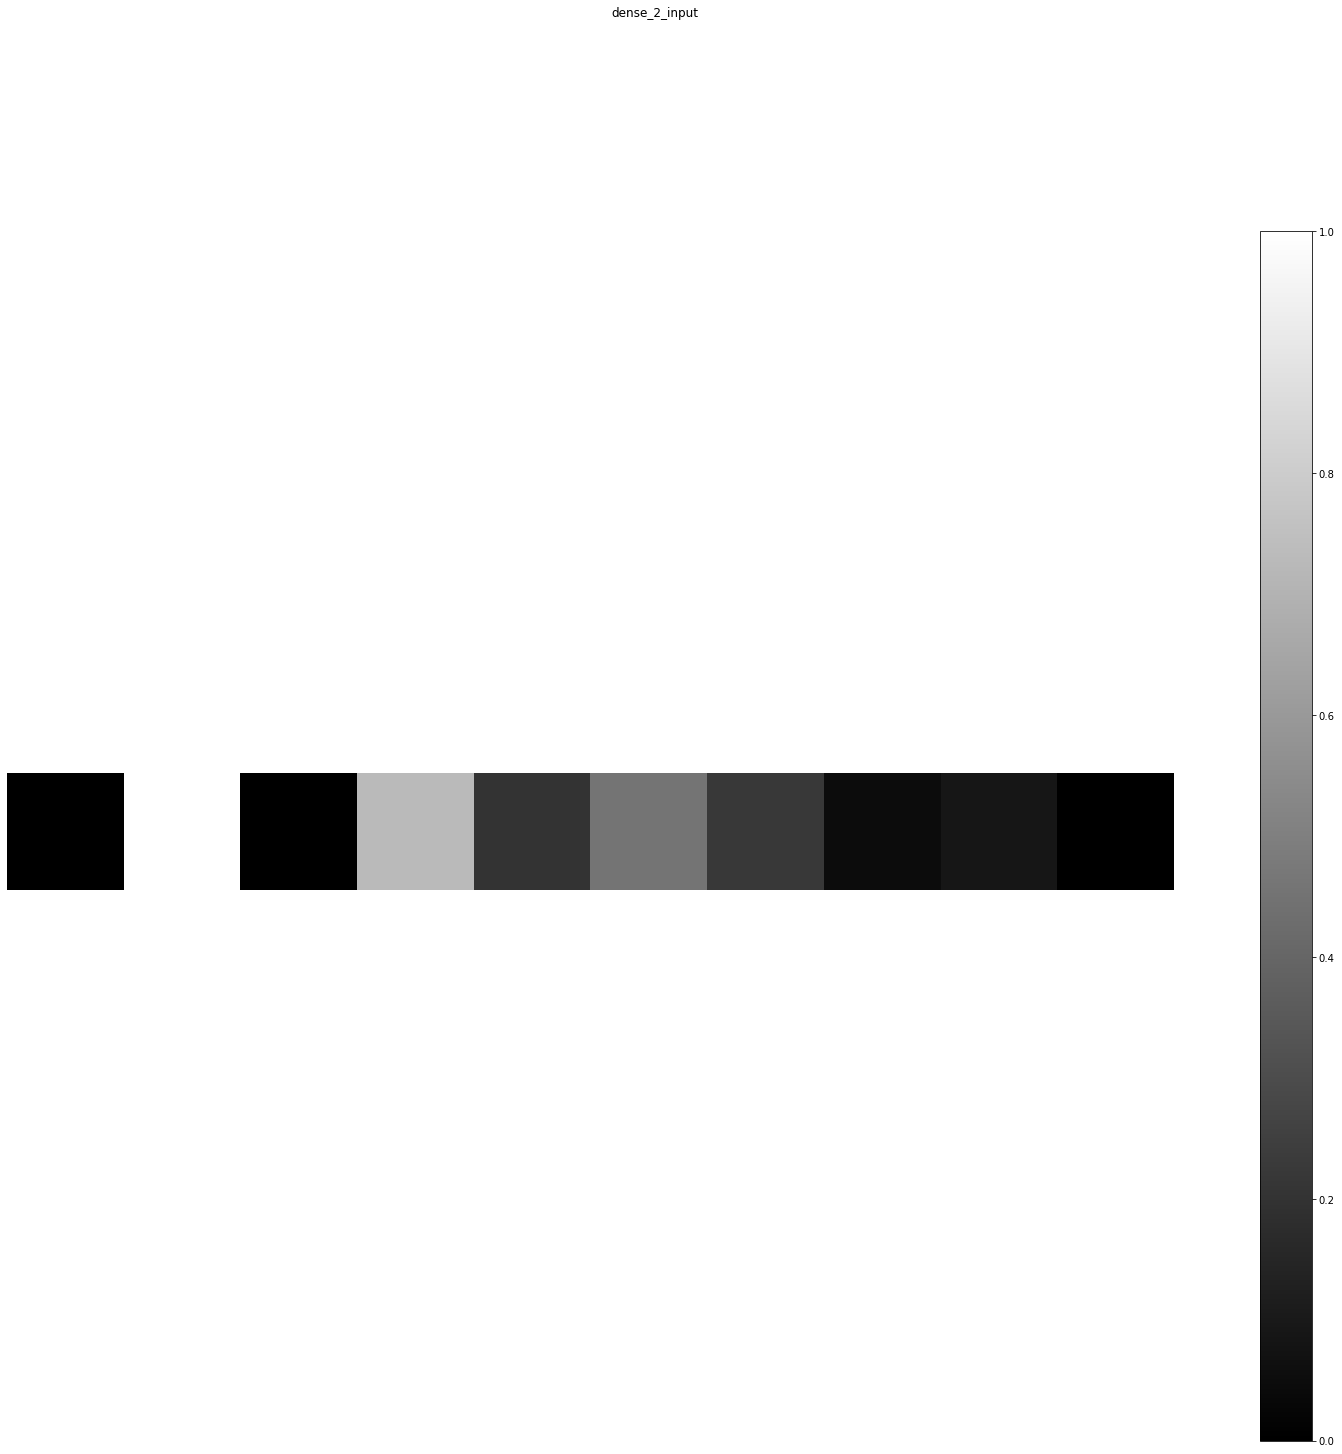

dense_2 (1, 4) 


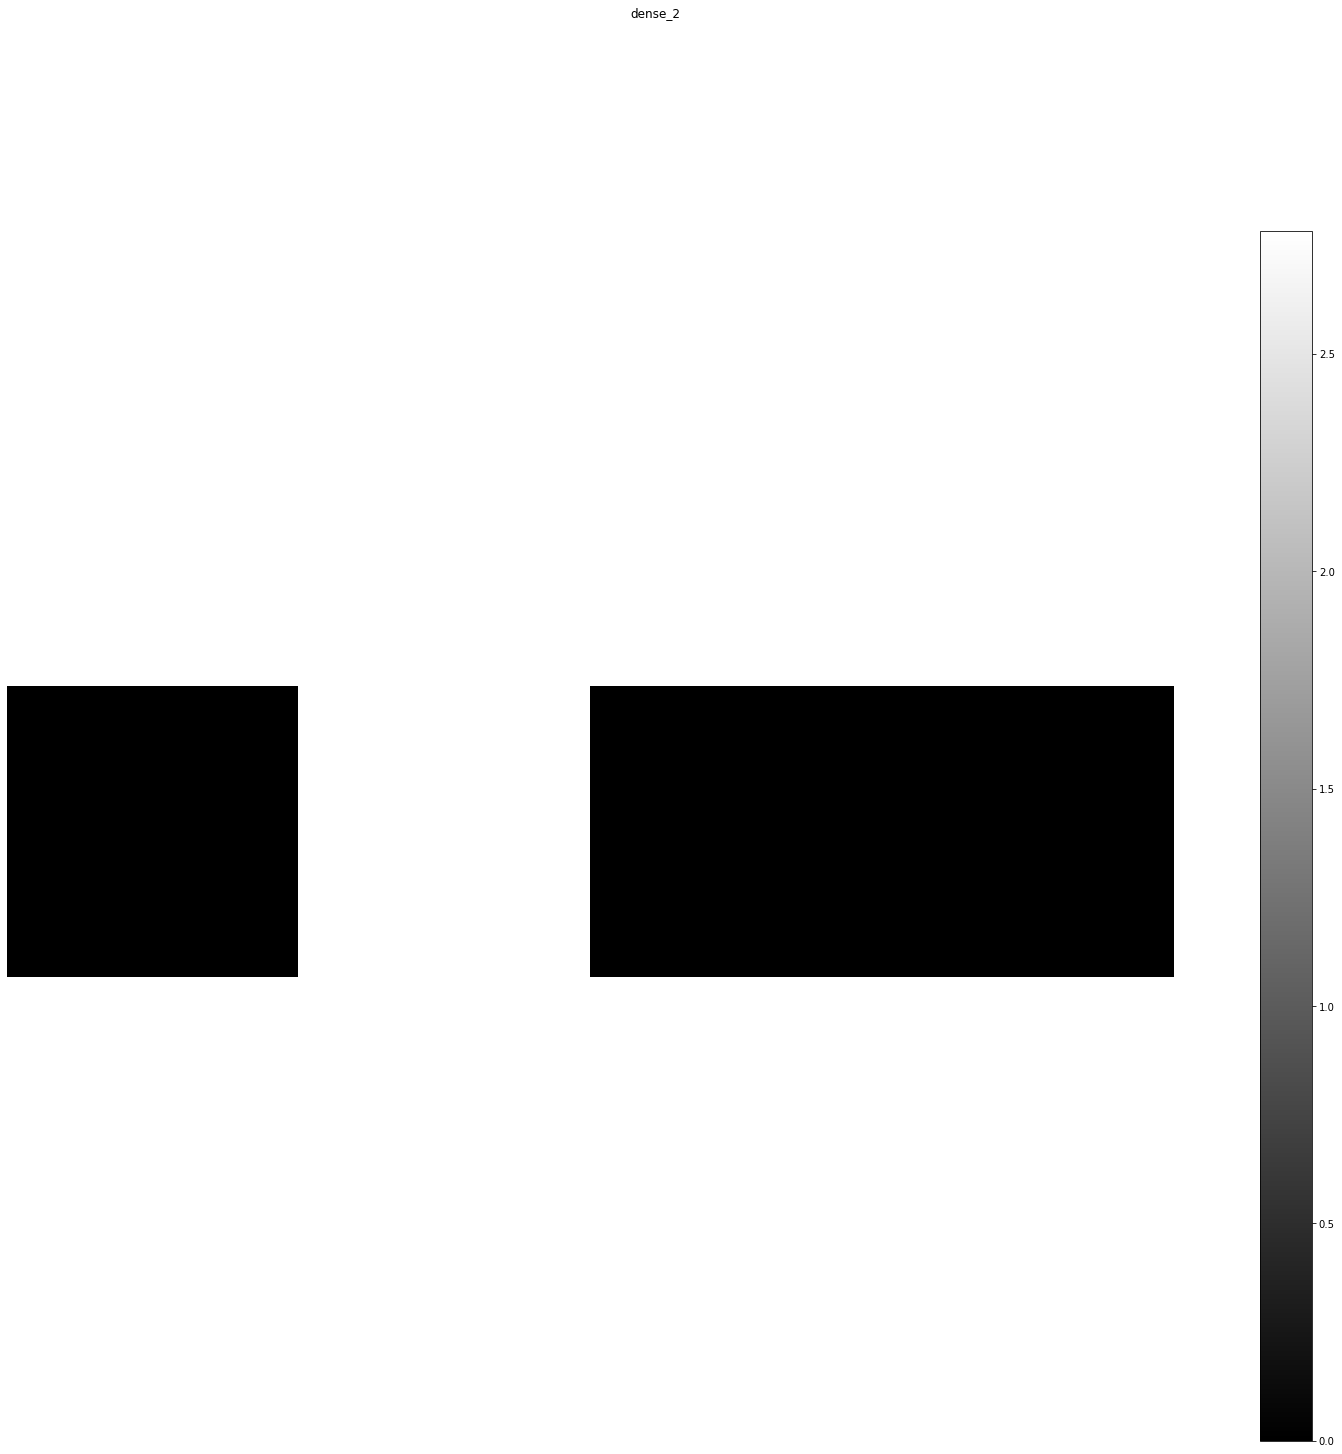

dense_3 (1, 10) 


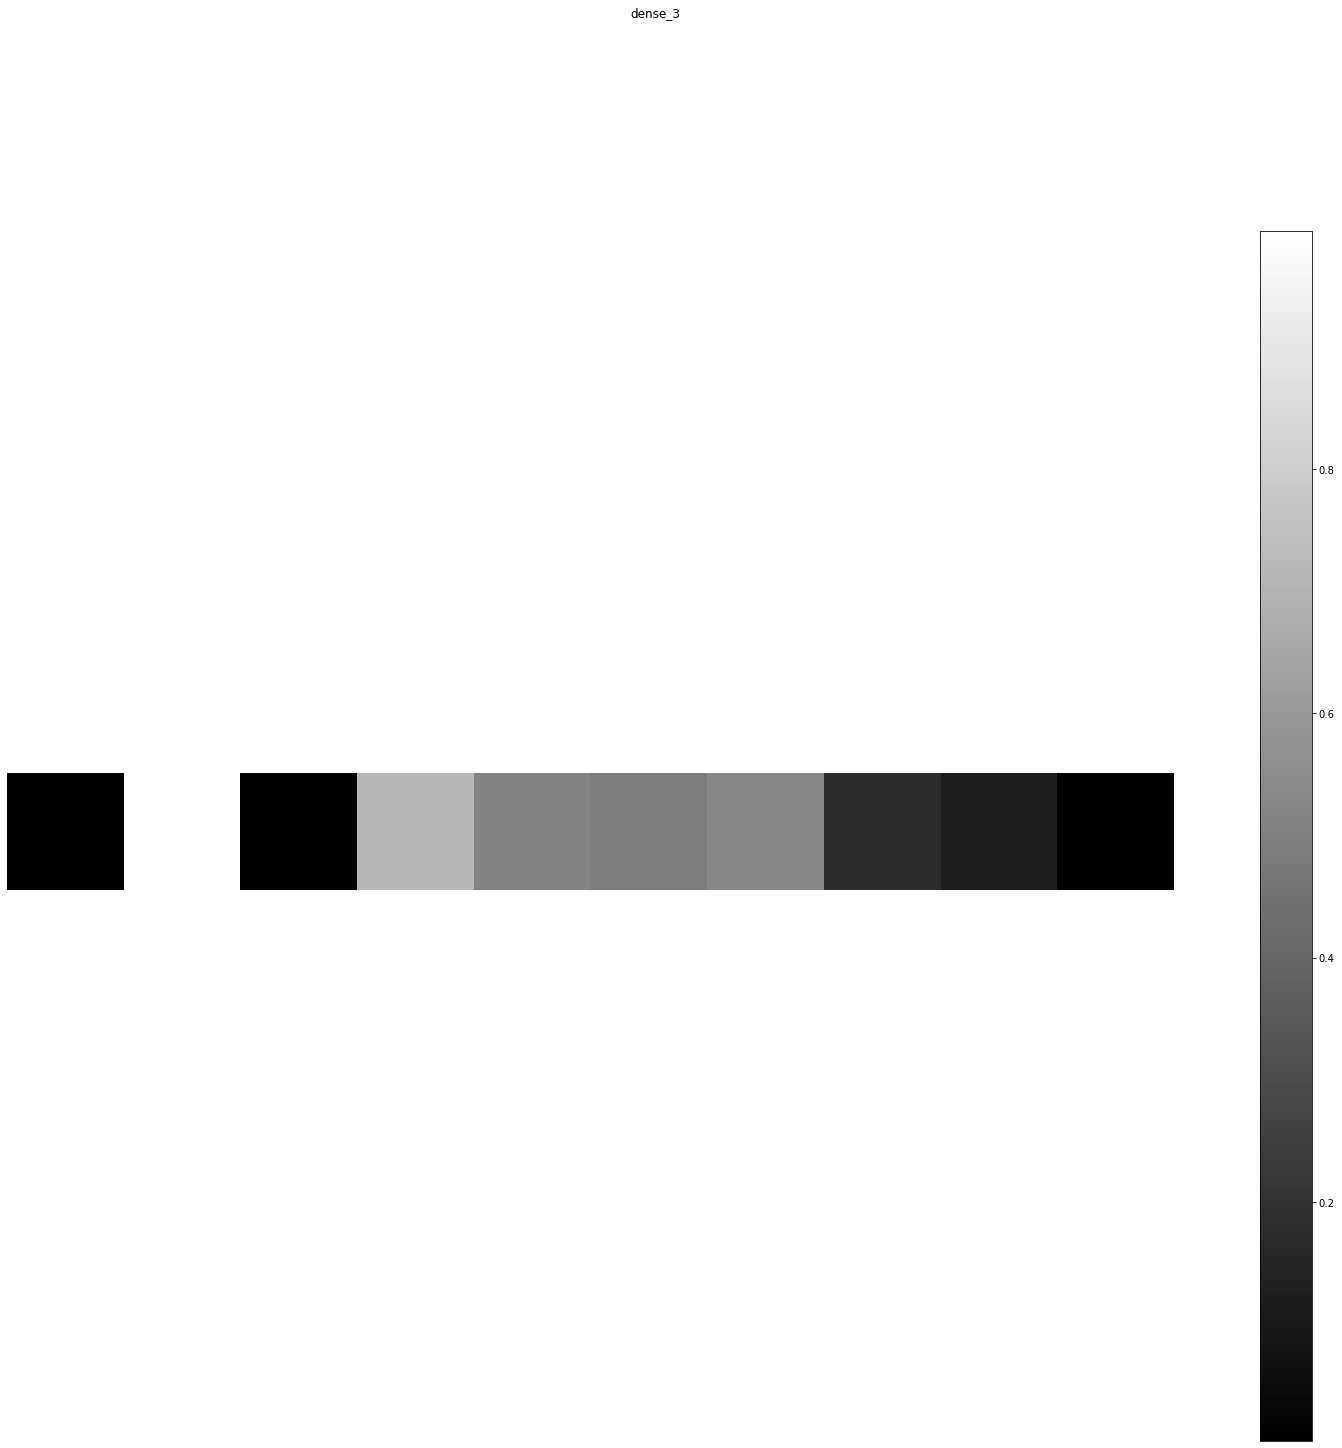

In [36]:
activations = get_activations(autoencoder, X_test[0:1])
display_activations(activations, cmap="gray", save=False)

# Implementing Variational Auto Encoders with MNIST data

In [37]:
class Sampling(layers.Layer):
    
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

## Creating the VA autoencoders 

In [66]:
#### Changing the image size
X_train_new = X_train.reshape(1500, 2, 5)

#### Build the encoder

In [88]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(2, 5, 1))
x = layers.Conv2D(32, 2, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 2, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_37 (InputLayer)          [(None, 2, 5, 1)]    0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 1, 3, 32)     160         ['input_37[0][0]']               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 1, 2, 64)     8256        ['conv2d_8[0][0]']               
                                                                                                  
 flatten_6 (Flatten)            (None, 128)          0           ['conv2d_9[0][0]']               
                                                                                            

#### Build the decoder

In [92]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(2 * 5 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((2, 5, 64))(x)
x = layers.Conv2DTranspose(64, 1, activation="relu", strides=1, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 1, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_49 (Dense)            (None, 640)               1920      
                                                                 
 reshape_20 (Reshape)        (None, 2, 5, 64)          0         
                                                                 
 conv2d_transpose_33 (Conv2D  (None, 2, 5, 64)         4160      
 Transpose)                                                      
                                                                 
 conv2d_transpose_34 (Conv2D  (None, 2, 5, 1)          65        
 Transpose)                                                      
                                                                 
Total params: 6,145
Trainable params: 6,145
Non-trainable p

## Define the VAE as a Model with a custom train_step

In [93]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

## Training the models with MNIST data

In [96]:
X_train_new.shape

(1500, 2, 5)

In [99]:
# vae = VAE(encoder, decoder)
# vae.compile(optimizer=keras.optimizers.Adam())
# vae.fit(X_train_new, epochs=30, batch_size=1500)

## Plotting the Latent space

In [100]:
# plot_latent_space(vae)

In [101]:
# (x_train, y_train), _ = keras.datasets.mnist.load_data()
# x_train = np.expand_dims(x_train, -1).astype("float32") / 255

# plot_label_clusters(vae, x_train, y_train)